**IRIS FLOWER CLASSIFICATION**

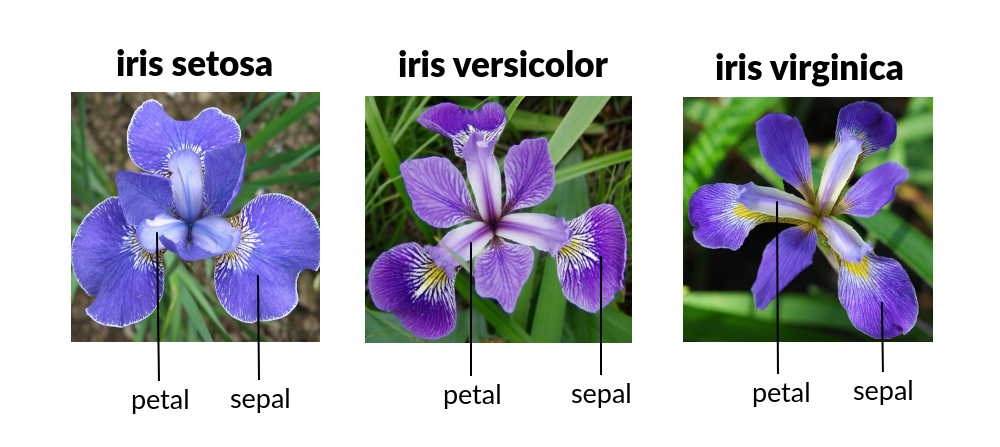

**ABOUT THE DATASET**


The objective of this dataset is to classify the Iris flowers into their respective species based on the four features.
The features (attributes) of the flowers are as follows:
Sepal Length (in centimeters) Sepal Width (in centimeters) Petal Length (in centimeters) Petal Width (in centimeters).

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data Loading.
df=pd.read_csv('/content/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Data Preprocessing.**

In [3]:
# Print First 5 rows.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Printing Last 5 rows.
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.shape

(150, 5)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(147, 5)

In [10]:
# Checking number of missing values.
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
# descriptive statistics of numeric variables
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


**Data Visualization.**

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

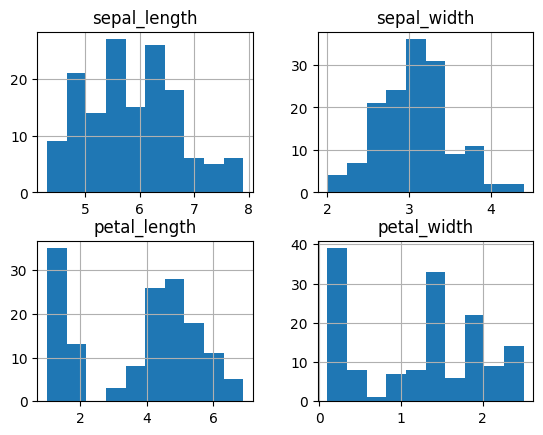

In [13]:
df.hist()

Text(0.5, 1.0, 'Sepal length Vs Sepal width distribution')

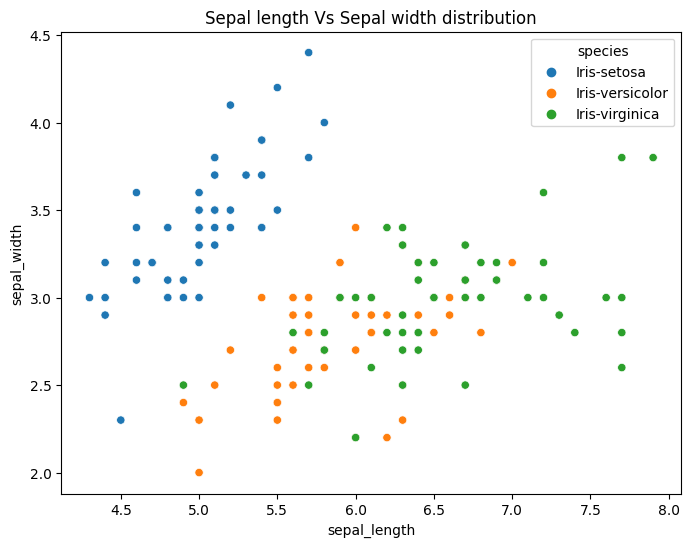

In [14]:
plt.figure(figsize=(8,6));
sns.scatterplot(x=df.sepal_length,y=df.sepal_width,hue=df['species']).set_title("Sepal length Vs Sepal width distribution")


<Axes: xlabel='species', ylabel='count'>

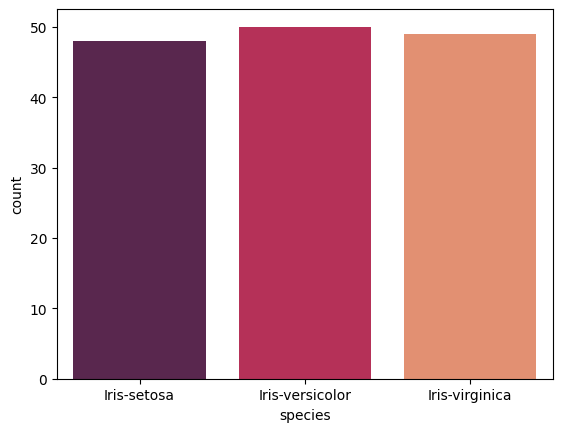

In [15]:
sns.countplot(x='species',data=df,palette='rocket')

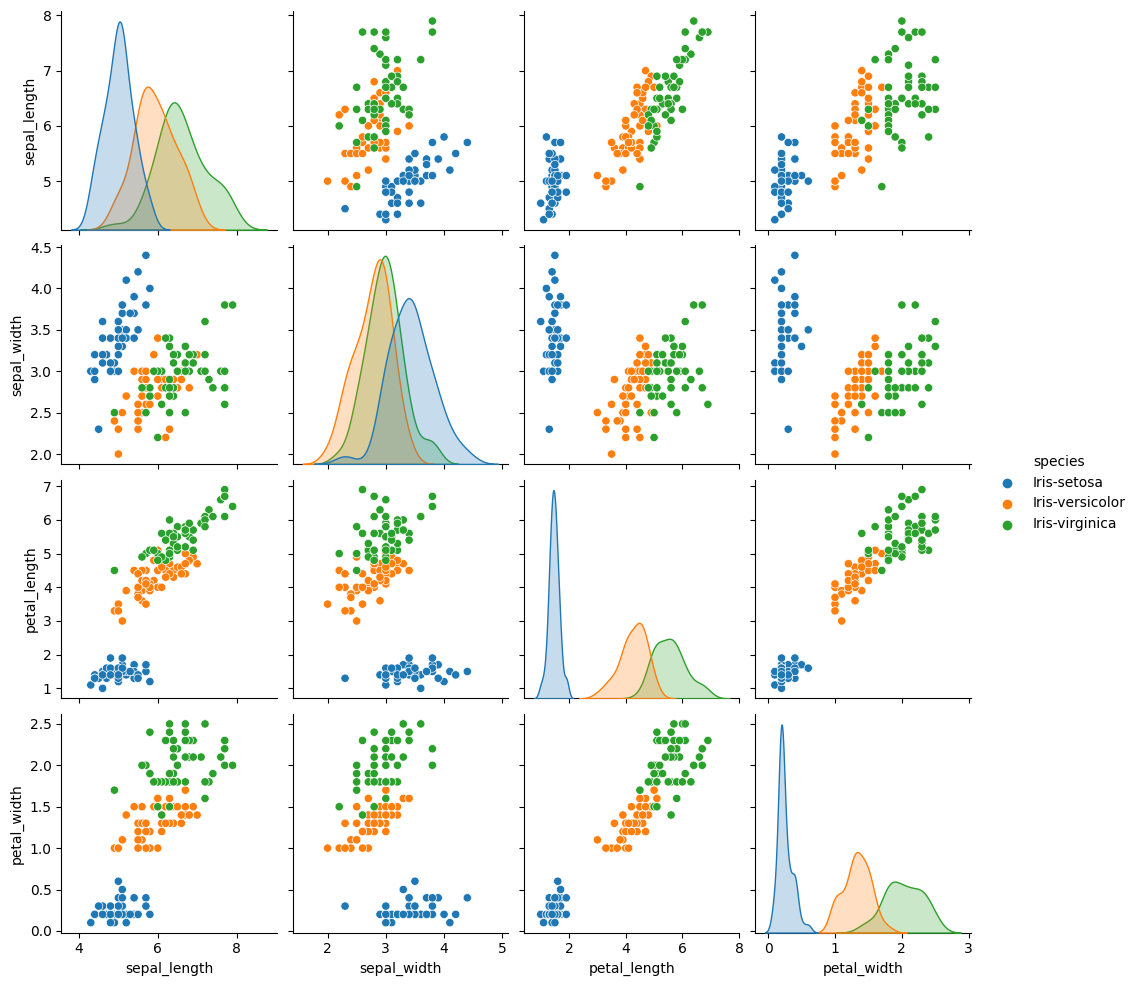

In [16]:
sns.pairplot(data=df,hue='species')

In [17]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


<ipython-input-18-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

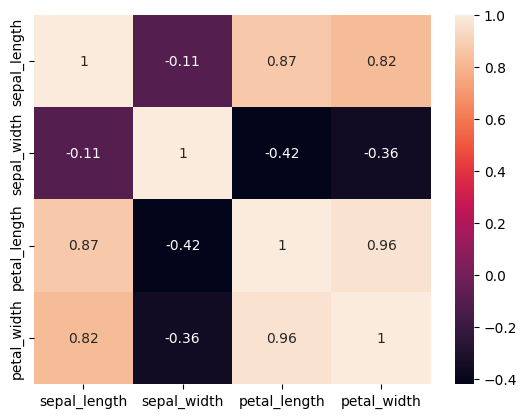

In [18]:
sns.heatmap(df.corr(),annot=True)

**Model Creation**

In [19]:
# Setting Features
x=df.drop(['species'],axis=1)
y=df['species']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)
x_train

array([[-0.23690478, -0.08738704,  0.20877397, -0.03330265],
       [ 1.16208031,  0.38174338,  1.19788343,  1.46132027],
       [ 0.78053892,  0.38174338,  0.73242015,  1.05369584],
       [-0.99998756,  1.085439  , -1.42034749, -1.39205076],
       [ 0.90771938, -0.08738704,  0.32513979,  0.23844697],
       [-0.10972432, -0.79108266,  0.15059106, -0.30505227],
       [-0.8728071 ,  0.85087379, -1.42034749, -1.39205076],
       [-1.8902508 ,  0.38174338, -1.4785304 , -1.39205076],
       [ 0.14463661, -1.9639087 ,  0.09240815, -0.30505227],
       [-1.38152895,  0.85087379, -1.12943294, -1.39205076],
       [-1.12716803, -0.08738704, -1.30398167, -1.39205076],
       [-0.99998756,  0.61630858, -1.24579876, -0.98442633],
       [ 0.14463661, -1.9639087 ,  0.67423724,  0.37432178],
       [ 1.03489985,  0.14717817,  0.49968851,  0.37432178],
       [ 1.03489985, -0.08738704,  0.79060306,  1.46132027],
       [-0.99998756,  1.78913462, -1.30398167, -1.39205076],
       [-0.23690478,  3.

In [22]:
x_test

array([[ 0.27181707, -0.08738704,  0.61605433,  0.78194622],
       [-0.49126571, -1.72934349,  0.09240815,  0.10257216],
       [ 1.03489985,  0.14717817,  1.0233347 ,  1.59719509],
       [-0.99998756,  1.78913462, -1.36216458, -1.25617595],
       [-1.25434849, -1.26021307,  0.3833227 ,  0.64607141],
       [-1.38152895, -0.08738704, -1.42034749, -1.52792557],
       [ 0.14463661, -0.32195225,  0.3833227 ,  0.37432178],
       [-0.61844617,  0.85087379, -1.36216458, -1.12030114],
       [ 0.14463661, -0.79108266,  0.73242015,  0.5101966 ],
       [-1.25434849,  0.14717817, -1.36216458, -1.52792557],
       [-1.12716803,  0.85087379, -1.30398167, -1.12030114],
       [-0.99998756, -1.26021307, -0.48942094, -0.16917746],
       [ 0.52617799, -1.26021307,  0.67423724,  0.91782103],
       [-0.36408525, -1.26021307,  0.03422524, -0.16917746],
       [ 0.52617799,  0.85087379,  1.0233347 ,  1.59719509],
       [ 0.39899753, -1.9639087 ,  0.3833227 ,  0.37432178],
       [-0.23690478,  1.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

**Performance Evaluation.**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
knn=KNeighborsClassifier()
base_nb=GaussianNB()
model_svm=SVC()
lst=[knn,base_nb,model_svm]


In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('-'*100)
  print("Accuray_score = ",accuracy_score(y_test,y_pred))
  print(' '*100)
  matr=confusion_matrix(y_test,y_pred)
  print(matr)
  print(' '*100)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
----------------------------------------------------------------------------------------------------
Accuray_score =  0.9555555555555556
                                                                                                    
[[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]
                                                                                                    
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

GaussianNB()
----------------------------------------------------------------------------------------------------
Accuray_score =  0.9777777777777777
                                                 

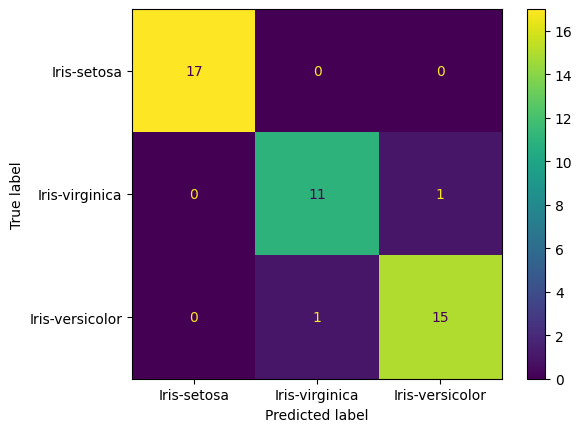

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
labels=['Iris-setosa', 'Iris-virginica','Iris-versicolor']
cmd=ConfusionMatrixDisplay(matr,display_labels=labels)
cmd.plot()